# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 11)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kassem, Mr. Fared",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
test_df.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Harder, Mrs. George Achilles (Dorothy Annan)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

# Analysis and Visualisation

## Univariate Analysis

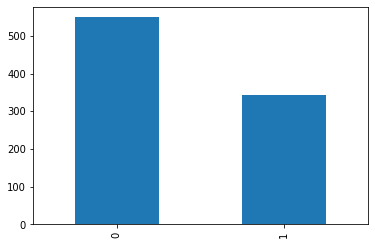

In [16]:
train_df['Survived'].value_counts().plot(kind = 'bar')

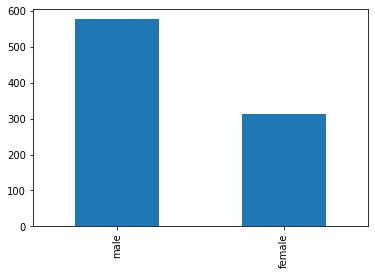

In [17]:
train_df['Sex'].value_counts().plot(kind = 'bar')

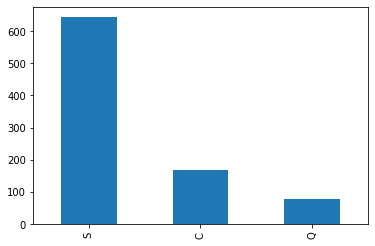

In [18]:
train_df['Embarked'].value_counts().plot(kind = 'bar')

Text(0.5, 0, 'Age')

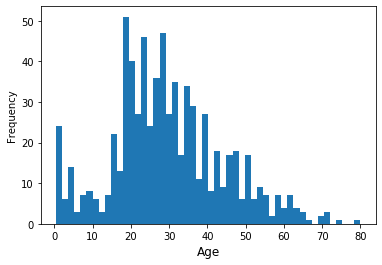

In [19]:
train_df['Age'].plot.hist(bins = 50)
plt.xlabel('Age', fontsize=12)

In [20]:
train_df['Survived'].value_counts()/len(train_df)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [21]:
train_df['Sex'].value_counts()/len(train_df)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

## Bivariate Analysis

In [22]:
temp = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for i in temp:
    print('************ Value Count in', i, '************')
    print(train_df[i].value_counts())
    print('')

************ Value Count in Survived ************
0    549
1    342
Name: Survived, dtype: int64

************ Value Count in Pclass ************
3    491
1    216
2    184
Name: Pclass, dtype: int64

************ Value Count in Sex ************
male      577
female    314
Name: Sex, dtype: int64

************ Value Count in SibSp ************
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

************ Value Count in Parch ************
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

************ Value Count in Embarked ************
S    644
C    168
Q     77
Name: Embarked, dtype: int64



In [23]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

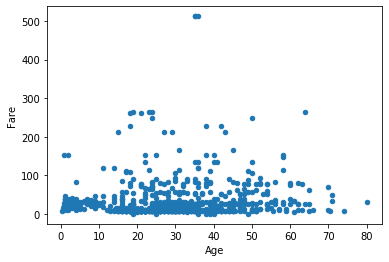

In [24]:
train_df.plot.scatter('Age','Fare')

In [25]:
pd.crosstab(train_df['Embarked'], train_df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


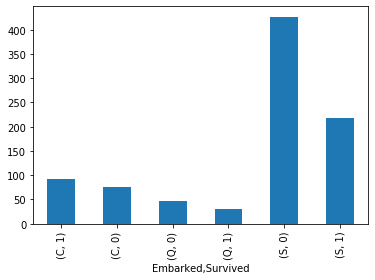

In [26]:
train_df.groupby('Embarked').Survived.value_counts().plot(kind='bar')

In [27]:
train_df[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


## Drop Duplicates

In [28]:
train_df = train_df.drop_duplicates()

In [29]:
train_df.shape

(891, 12)

## Missing Values

In [30]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
train_df['Age'].fillna(value = (train_df['Age'].mean()), inplace=True)

In [33]:
test_df['Age'].fillna(value = (test_df['Age'].mean()), inplace=True)

In [34]:
test_df['Fare'].fillna(value = (test_df['Fare'].mean()), inplace=True)

In [35]:
train_df['Embarked'].fillna(value = (train_df['Embarked'].mode()[0]), inplace=True)

In [36]:
# dropping column Cabin
drop_col = ['Cabin']
train_df.drop(drop_col, axis=1, inplace=True)
test_df.drop(drop_col, axis=1, inplace=True)

In [37]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
train_df = train_df.astype({'Age': 'int64'})
test_df = test_df.astype({'Age': 'int64'})

In [40]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [41]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## Preprocessing / Feature Engineering

### Converting categorical values

In [42]:
## creating bin for age
train_df['Age_bin'] = pd.cut(train_df['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
test_df['Age_bin'] = pd.cut(test_df['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [43]:
## creating bin for fare
train_df['Fare_bin'] = pd.cut(train_df['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
test_df['Fare_bin'] = pd.cut(test_df['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])

In [44]:
drop_column = ['Age','Fare','Name','Ticket']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column, axis=1, inplace = True)

In [45]:
drop_column = ['PassengerId']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column, axis=1, inplace = True)

In [46]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_bin,Fare_bin
0,0,3,male,1,0,S,Adult,Low_fare
1,1,1,female,1,0,C,Adult,high_fare
2,1,3,female,0,0,S,Adult,median_fare
3,1,1,female,1,0,S,Adult,high_fare
4,0,3,male,0,0,S,Adult,median_fare


In [47]:
test_df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_bin,Fare_bin
0,3,male,0,0,Q,Adult,Low_fare
1,3,female,1,0,S,Elder,Low_fare
2,2,male,0,0,Q,Elder,median_fare
3,3,male,0,0,S,Adult,median_fare
4,3,female,1,1,S,Adult,median_fare


In [48]:
train_df = pd.get_dummies(train_df, columns = ["Sex","Age_bin","Embarked","Fare_bin"])
test_df = pd.get_dummies(test_df, columns = ["Sex","Age_bin","Embarked","Fare_bin"])

In [49]:
train_df.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_bin_Low_fare,Fare_bin_median_fare,Fare_bin_Average_fare,Fare_bin_high_fare
0,0,3,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
1,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,1,3,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
3,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


### Feature Selection

In [50]:
All_cols = train_df.drop("Survived",axis=1)
Target_col = train_df["Survived"]

### Normalize Data

In [51]:
All_cols= preprocessing.StandardScaler().fit_transform(All_cols)
All_cols[0:5]

array([[ 0.82737724,  0.43279337, -0.47367361, -0.73769513,  0.73769513,
        -0.2734756 , -0.37723692,  0.76327796, -0.44630983, -0.48204268,
        -0.30756234,  0.61583843,  1.8120855 , -0.56741383, -0.58815087,
        -0.51015154],
       [-1.56610693,  0.43279337, -0.47367361,  1.35557354, -1.35557354,
        -0.2734756 , -0.37723692,  0.76327796, -0.44630983,  2.0745051 ,
        -0.30756234, -1.62380254, -0.55185034, -0.56741383, -0.58815087,
         1.96020185],
       [ 0.82737724, -0.4745452 , -0.47367361,  1.35557354, -1.35557354,
        -0.2734756 , -0.37723692,  0.76327796, -0.44630983, -0.48204268,
        -0.30756234,  0.61583843, -0.55185034,  1.76238213, -0.58815087,
        -0.51015154],
       [-1.56610693,  0.43279337, -0.47367361,  1.35557354, -1.35557354,
        -0.2734756 , -0.37723692,  0.76327796, -0.44630983, -0.48204268,
        -0.30756234,  0.61583843, -0.55185034, -0.56741383, -0.58815087,
         1.96020185],
       [ 0.82737724, -0.4745452 , -0

In [52]:
trainScores={}

# Building Classifier Model

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [54]:
X_train,X_test,y_train,y_test = train_test_split(All_cols,Target_col,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 16), (268, 16), (623,), (268,))

## KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,40):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    scores = cross_val_score(clf_knn, X_train, y_train, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)


Best K is : 15 | Cross validation Accuracy : 0.7993759600614438


In [56]:
clf_knn=best_clf
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [57]:
y_pred=best_clf.predict(X_train)

In [58]:
trainScores['KNN-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')  
trainScores['KNN-logLoss']=log_loss(y_train, y_pred)
trainScores

{'KNN-jaccard': 0.812199036918138,
 'KNN-f1-score': 0.8071630225129611,
 'KNN-logLoss': 6.4864616753002196}

The cross validated score for KNN Classifier is: 0.7969240154352514


Text(0.5, 1.05, 'Confusion_matrix')

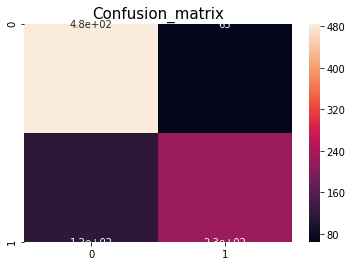

In [59]:
result_knn=cross_val_score(clf_knn,All_cols,Target_col,cv=10,scoring='accuracy')
print('The cross validated score for KNN Classifier is:',result_knn.mean())
y_pred = cross_val_predict(clf_knn,All_cols,Target_col,cv=10)
sns.heatmap(confusion_matrix(Target_col,y_pred),annot=True)
plt.title('Confusion_matrix', y=1.05, size=15)

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')
clf_log.fit(X_train, y_train)

y_pred=clf_log.predict(X_train)
y_proba=clf_log.predict_proba(X_train)

In [61]:
trainScores['LogReg-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
trainScores['LogReg-logLoss']=log_loss(y_train, y_proba)

The cross validated score for LR Classifier is: 0.7980859153331064


Text(0.5, 1.05, 'Confusion_matrix')

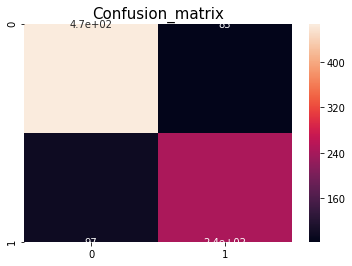

In [62]:
result_log=cross_val_score(clf_log,All_cols,Target_col,cv=10,scoring='accuracy')
print('The cross validated score for LR Classifier is:',result_log.mean())
y_pred = cross_val_predict(clf_log,All_cols,Target_col,cv=10)
sns.heatmap(confusion_matrix(Target_col,y_pred),annot=True)
plt.title('Confusion_matrix', y=1.05, size=15)

In [63]:
trainScores

{'KNN-jaccard': 0.812199036918138,
 'KNN-f1-score': 0.8071630225129611,
 'KNN-logLoss': 6.4864616753002196,
 'LogReg-jaccard': 0.8089887640449438,
 'LogReg-f1-score': 0.807367195500007,
 'LogReg-logLoss': 0.4349696588786609}

## Support Vector Machine

In [64]:
y_train=y_train.astype(float)

In [65]:
from sklearn import svm
clf_svm = svm.LinearSVC(random_state=7)
clf_svm.fit(X_train, y_train)  
y_pred=clf_svm.predict(X_train)

In [66]:
trainScores['SVM-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted')  

The cross validated score for SVM Classifier is: 0.8025553285665646


Text(0.5, 1.05, 'Confusion_matrix')

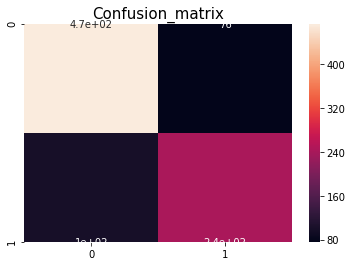

In [67]:
result_svm=cross_val_score(clf_svm,All_cols,Target_col,cv=10,scoring='accuracy')
print('The cross validated score for SVM Classifier is:',result_svm.mean())
y_pred = cross_val_predict(clf_svm,All_cols,Target_col,cv=10)
sns.heatmap(confusion_matrix(Target_col,y_pred),annot=True)
plt.title('Confusion_matrix', y=1.05, size=15)

In [68]:
trainScores

{'KNN-jaccard': 0.812199036918138,
 'KNN-f1-score': 0.8071630225129611,
 'KNN-logLoss': 6.4864616753002196,
 'LogReg-jaccard': 0.8089887640449438,
 'LogReg-f1-score': 0.807367195500007,
 'LogReg-logLoss': 0.4349696588786609,
 'SVM-jaccard': 0.8089887640449438,
 'SVM-f1-score': 0.8071523705348103}

## Decision Tree

In [69]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

y_pred=clf_tree.predict(X_train)

In [70]:
trainScores['Tree-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')  

The cross validated score for DTree Classifier is: 0.8092969016002725


Text(0.5, 1.05, 'Confusion_matrix')

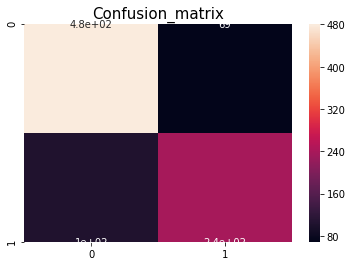

In [71]:
result_tree=cross_val_score(clf_tree,All_cols,Target_col,cv=10,scoring='accuracy')
print('The cross validated score for DTree Classifier is:',result_tree.mean())
y_pred = cross_val_predict(clf_tree,All_cols,Target_col,cv=10)
sns.heatmap(confusion_matrix(Target_col,y_pred),annot=True)
plt.title('Confusion_matrix', y=1.05, size=15)

In [72]:
trainScores

{'KNN-jaccard': 0.812199036918138,
 'KNN-f1-score': 0.8071630225129611,
 'KNN-logLoss': 6.4864616753002196,
 'LogReg-jaccard': 0.8089887640449438,
 'LogReg-f1-score': 0.807367195500007,
 'LogReg-logLoss': 0.4349696588786609,
 'SVM-jaccard': 0.8089887640449438,
 'SVM-f1-score': 0.8071523705348103,
 'Tree-jaccard': 0.8956661316211878,
 'Tree-f1-score': 0.8930249126960136}

## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf_rm = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
clf_rm = clf_rm.fit(X_train,y_train)
y_pred=clf_rm.predict(X_test)

The cross validated score for Random Forest Classifier is: 0.8238409374645329


Text(0.5, 1.05, 'Confusion_matrix')

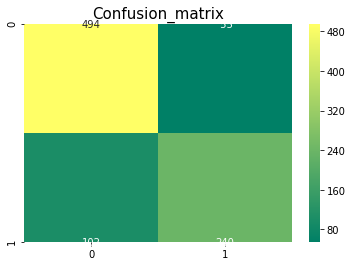

In [76]:
result_rm=cross_val_score(clf_rm,All_cols,Target_col,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',result_rm.mean())
y_pred = cross_val_predict(clf_rm,All_cols,Target_col,cv=10)
sns.heatmap(confusion_matrix(Target_col,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Accuracies of all Models

In [77]:
print('-------Accuracies--------')
print('The cross validated score for KNN Classifier is:',result_knn.mean())
print('The cross validated score for LR Classifier is:',result_log.mean())
print('The cross validated score for SVM Classifier is:',result_svm.mean())
print('The cross validated score for DTree Classifier is:',result_tree.mean())
print('The cross validated score for Random Forest Classifier is:',result_rm.mean())

-------Accuracies--------
The cross validated score for KNN Classifier is: 0.7969240154352514
The cross validated score for LR Classifier is: 0.7980859153331064
The cross validated score for SVM Classifier is: 0.8025553285665646
The cross validated score for DTree Classifier is: 0.8092969016002725
The cross validated score for Random Forest Classifier is: 0.8238409374645329


# Prediction using Test Set

In [78]:
test_df.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_bin_Low_fare,Fare_bin_median_fare,Fare_bin_Average_fare,Fare_bin_high_fare
0,3,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
1,3,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0
2,2,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
3,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,3,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0


In [79]:
All_cols = test_df
testX= preprocessing.StandardScaler().fit_transform(All_cols)

In [80]:
knn_pred=clf_knn.predict(testX)
knn_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [81]:
log_pred=clf_log.predict(testX)
log_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
svm_pred=clf_svm.predict(testX)
svm_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [83]:
tree_pred=clf_tree.predict(testX)
tree_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0.

In [84]:
rm_pred=clf_rm.predict(testX)
rm_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.